In [1]:
import pandas as pd
import numpy as np

In [2]:
df_test = pd.read_csv(r"C:\Users\Franco Gabriel\Downloads\merged\merge_test.csv")


In [3]:
df_train = pd.read_csv(r"C:\Users\Franco Gabriel\Downloads\merged\merge_train.csv")

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   CNT_CHILDREN                 307511 non-null  int64  
 3   AMT_INCOME_TOTAL             307511 non-null  float64
 4   AMT_CREDIT                   307511 non-null  float64
 5   AMT_ANNUITY                  307499 non-null  float64
 6   AMT_GOODS_PRICE              307233 non-null  float64
 7   REGION_POPULATION_RELATIVE   307511 non-null  float64
 8   YEARS_OLD                    307511 non-null  int64  
 9   YEARS_EMPLOYED               307511 non-null  int64  
 10  DAYS_REGISTRATION            307511 non-null  float64
 11  DAYS_ID_PUBLISH              307511 non-null  int64  
 12  OWN_CAR_AGE                  104582 non-null  float64
 13 

In [5]:
df_train.shape

(307511, 83)

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 131 entries, SK_ID_CURR to COMPLETED
dtypes: float64(75), int64(40), object(16)
memory usage: 48.7+ MB


In [7]:
df_train.OCCUPATION_TYPE_encoded.max()

18

In [8]:
df_train.drop(['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
               'YEARS_BEGINEXPLUATATION_AVG',
               'YEARS_BUILD_AVG','COMMONAREA_AVG',
               'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG',
               'FLOORSMIN_AVG','LANDAREA_AVG',
               'LIVINGAPARTMENTS_AVG',
               'LIVINGAREA_AVG',
               'NONLIVINGAPARTMENTS_AVG',
               'NONLIVINGAREA_AVG' ],axis=1, inplace=True)

In [9]:
df_train.columns


Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'YEARS_OLD', 'YEARS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_CONTRACT_TYPE_encoded',
       'CODE_GENDER_encoded', 'FLAG_OWN_CAR_encoded',
       'FLAG_OWN_REALTY_encoded', 'NAME_TYPE_SUITE_encoded',
    

In [10]:
for col in df_test.columns:
    if not col in df_train:
        df_test.drop([f'{col}'], axis=1, inplace=True)

In [11]:
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns

df_train = df_train.drop(columns=categorical_columns)


In [12]:
#OLD_CAR also stands for those cases which the person does not owe a car
df_train['OLD_CAR'] = np.where(df_train['OWN_CAR_AGE'] < 5, 0, 1)


In [13]:
df_train.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'OWN_CAR_AGE'], inplace=True)

In [32]:
'''
CNT_INSTALMENT_MAX              media
DAYS_PST_DUE_MAX                0
AMT_LARGEST_RECORDED_DEBT      0
DAYS_SINCE_LAST_APPLICATION     -3000
AMT_CREDIT_MAX                media
AMT_CREDIT_SUM_DEBT             0
CNT_CREDIT_PROLONG_MAX          0
ACTIVE                          0
BAD_DEBT                        0
COMPLETED                       0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CIRCLE         0
DEF_60_CNT_SOCIAL_CIRCLE         0
'''
cols = ['DAYS_PST_DUE_MAX','AMT_LARGEST_RECORDED_DEBT','AMT_CREDIT_SUM_DEBT','CNT_CREDIT_PROLONG_MAX','ACTIVE','BAD_DEBT','COMPLETED','OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']
df_train[cols] = df_train[cols].fillna(0)
print(df_train[cols].isna().sum())
      
cols_for_mean = ['CNT_INSTALMENT_MAX','AMT_CREDIT_MAX']

for cols in cols_for_mean:
    
    df_train[cols] = df_train[cols].fillna(df_train[cols].mean())
df_train['DAYS_SINCE_LAST_APPLICATION'] = df_train['DAYS_SINCE_LAST_APPLICATION'].fillna(-3000)
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].fillna(-3000)


DAYS_PST_DUE_MAX             0
AMT_LARGEST_RECORDED_DEBT    0
AMT_CREDIT_SUM_DEBT          0
CNT_CREDIT_PROLONG_MAX       0
ACTIVE                       0
BAD_DEBT                     0
COMPLETED                    0
OBS_30_CNT_SOCIAL_CIRCLE     0
DEF_30_CNT_SOCIAL_CIRCLE     0
OBS_60_CNT_SOCIAL_CIRCLE     0
DEF_60_CNT_SOCIAL_CIRCLE     0
AMT_GOODS_PRICE              0
AMT_ANNUITY                  0
CNT_FAM_MEMBERS              0
dtype: int64


In [19]:
#To fill the Nan values from EXT_SOURCE_1, EXT_SOURCE_2,EXT_SOURCE_3, 0.5 will be the default value:

df_train['EXT_SOURCE_1'] = df_train['EXT_SOURCE_1'].fillna(0.5)
df_train['EXT_SOURCE_2'] = df_train['EXT_SOURCE_2'].fillna(0.5)
df_train['EXT_SOURCE_3'] = df_train['EXT_SOURCE_3'].fillna(0.5)

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_train.drop(columns=['TARGET']) 
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [34]:
X.isna().sum()

SK_ID_CURR                     0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
YEARS_OLD                      0
YEARS_EMPLOYED                 0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
NAME_CONTRACT_TYPE_encoded     0
CODE_GENDER_encoded            0
FLAG_OWN_C

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=1)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"MaE: {mae:.4f}")

rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.4f}")


MSE: 0.0707
MaE: 0.1488
RMSE: 0.2660
R²: 0.0476


In [40]:
importances = rf.feature_importances_  # Extraer importancia de cada feature
feature_names = X.columns  # Obtener nombres de las columnas

# Ordenar las features por importancia
sorted_indices = importances.argsort()[::-1]

# Mostrar las features con sus importancias
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


EXT_SOURCE_2: 0.0815
EXT_SOURCE_3: 0.0631
DAYS_REGISTRATION: 0.0545
DAYS_ID_PUBLISH: 0.0545
SK_ID_CURR: 0.0543
AMT_ANNUITY: 0.0439
DAYS_LAST_PHONE_CHANGE: 0.0435
DAYS_SINCE_LAST_APPLICATION: 0.0430
EXT_SOURCE_1: 0.0389
AMT_CREDIT_MAX: 0.0385
REGION_POPULATION_RELATIVE: 0.0375
AMT_INCOME_TOTAL: 0.0357
YEARS_OLD: 0.0352
AMT_CREDIT: 0.0324
AMT_CREDIT_SUM_DEBT: 0.0289
CNT_INSTALMENT_MAX: 0.0288
ORGANIZATION_TYPE_encoded: 0.0254
AMT_GOODS_PRICE: 0.0244
YEARS_EMPLOYED: 0.0229
AMT_LARGEST_RECORDED_DEBT: 0.0206
OCCUPATION_TYPE_encoded: 0.0191
ACTIVE: 0.0186
DAYS_PST_DUE_MAX: 0.0156
NAME_FAMILY_STATUS_encoded: 0.0121
OBS_60_CNT_SOCIAL_CIRCLE: 0.0114
OBS_30_CNT_SOCIAL_CIRCLE: 0.0113
CNT_FAM_MEMBERS: 0.0097
NAME_HOUSING_TYPE_encoded: 0.0082
NAME_TYPE_SUITE_encoded: 0.0081
NAME_INCOME_TYPE_encoded: 0.0066
CNT_CHILDREN: 0.0066
NAME_EDUCATION_TYPE_encoded: 0.0062
DEF_30_CNT_SOCIAL_CIRCLE: 0.0058
DEF_60_CNT_SOCIAL_CIRCLE: 0.0058
CODE_GENDER_encoded: 0.0053
REGION_RATING_CLIENT_W_CITY: 0.0048
FLAG_WOR

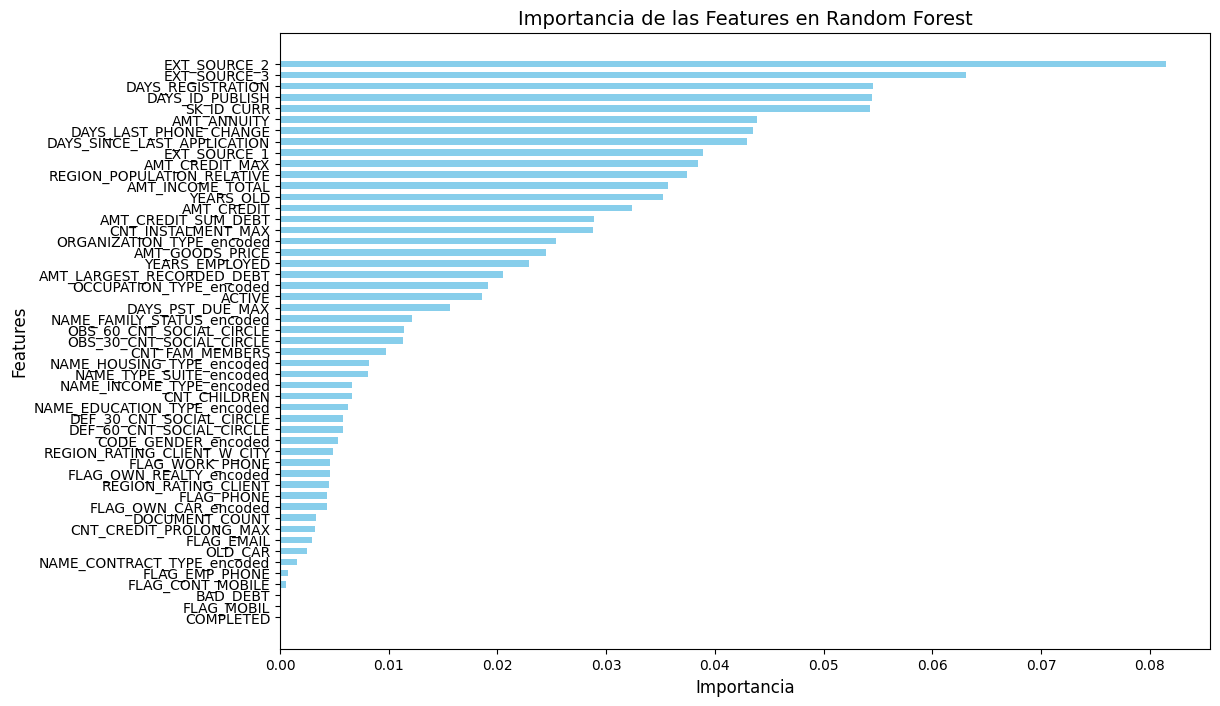

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Aumentamos el tamaño de la figura
plt.barh(feature_names[sorted_indices], importances[sorted_indices], 
         color="skyblue", height=0.6)  # Reduce el grosor de las barras para más espacio

plt.xlabel("Importancia", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Importancia de las Features en Random Forest", fontsize=14)

plt.gca().invert_yaxis()  # Para que la más importante aparezca arriba
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Ajustar tamaño y evitar rotaciones en etiquetas

plt.show()